In [75]:
import math
from scipy import integrate
import numpy as np
from scipy.integrate import odeint
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [76]:
bodies = 3
N = bodies * 4
# position = [random.randint(-100,100) for _ in range(N)]
# velocity = [random.randint(-,100) for _ in range(N)]

#v = [random.randint(-100,100) for _ in range(N)]
# we use it later to sum the escapers
prob = np.zeros(3)

G = 1
au = 1
mass = [10 ,15,20] 

# G = 6.674e-11
# Msun = 1.989e+30
# mass = [15 * Msun,15 * Msun,15 * Msun] 
# au = 1.495e+11
# velo = 30000

In [77]:
def derivative(v):

    dv = np.zeros(bodies*4)
    
    for i in range(bodies):
        J = i * 4
        dv[J+0] = v[J + 2]
        dv[J+1] = v[J + 3]
        dv[J+2] = acceleration(v,i,0)
        dv[J+3] = acceleration(v,i,1)
        # dv[J+2] = 0
        # dv[J+3] = 0
    
    return dv



def acceleration(v, j1, coordinate):
    
    result = 0
    j2 = j1 * 4 
    for j3 in range(bodies):
        if(j1 == j3):
             continue
        j4 = j3 * 4 
        totalDist=R(v[j4 + 0],v[j4 + 1],v[j2 + 0],v[j2 + 1])
        result += -G * mass[j3] * (v[j2 + coordinate] - v[j4 + coordinate]) / pow(totalDist,3)
    
    return result
    

def R(x1,y1,x2,y2):
    deltaX = x1-x2
    deltaY = y1-y2
    r = math.sqrt(pow(deltaX,2) + pow(deltaY,2))
    return r

def V(v1,v2):
    velocity = math.sqrt(pow(v1,2)+pow(v2,2))
    return velocity


def calculateEnergy(v):
  r01 = R(v[0],v[1],v[4],v[5])
  r02 = R(v[0],v[1],v[8],v[9])
  r12 = R(v[4],v[5],v[8],v[9])
  v0 = V(v[2],v[3])
  v1 = V(v[6],v[7])
  v2 = V(v[10],v[11])
  E = -(G*mass[0]*mass[1])/r01 -(G*mass[0]*mass[2])/r02 -(G*mass[2]*mass[1])/r12 +(mass[0] * pow(v0,2))/2 + (mass[1] * pow(v1,2))/2 + (mass[2] * pow(v2,2))/2
  return E,r01,r02,r12
  

In [78]:
# parameters
delta_t = 0.001
steps = 200000
dots = []

v= [10,30,0.7,0.7,-10,-30,0.,-70,200,0,1,1]
# v = [10*au,1*au,0.5*velo,-0.3*velo,11*au,2*au,-0.2*velo,0.10*velo,12*au,0*au,0.5*velo,0.3*velo]
[E,r01,r02,r12] = calculateEnergy(v)
print(E)
print("initial", v)
dots.append(v[0])
dots.append(v[1])
dots.append(v[4])
dots.append(v[5])
dots.append(v[8])
dots.append(v[9])

for t in range(steps-1):
  [E,r01,r02,r12] = calculateEnergy(v)

  u = derivative(v)
  # if (E>=0):
  #   break
  for k in range(bodies):
    K = k * 4
    v[K] = v[K] + u[K]*delta_t
    v[K + 1] = v[K + 1] + u[K + 1] * delta_t
    v[K + 2] = u[K] + u[K + 2] * delta_t
    v[K + 3] = u[K + 1] + u[K + 3] * delta_t

    dots.append(v[K])
    dots.append(v[K+1])
  # if(t!=0 and t%40000==0):
  #   print(t)
  #   print(v)
  [E,r01,r02,r12] = calculateEnergy(v)
  # # bound
  # if(E < 0):
  #   s=2
  # # unbounded
  # else:
  #   s=3    
print("  final ", v)
print(E)
print(t)
  # r01 = R(v[0],v[1],v[4],v[5])
  # r02 = R(v[0],v[1],v[8],v[9])
  # r12 = R(v[4],v[5],v[8],v[9])
  # #     
  # RR = [r02+r01,r01+r12,r02+r12]
  # g=max(RR)
  # for o in range(3):
  #       if(RR[o] == g):
  #           prob[o]+=1
  #           break

36770.07432770268
initial [10, 30, 0.7, 0.7, -10, -30, 0.0, -70, 200, 0, 1, 1]
  final  [159.14551921221718, 168.81525708198814, 0.7859143101376399, 0.6955861379056456, -9.69841539118298, -14029.250546792322, 0.0015276502473359295, -69.99648398585447, 395.19970193728557, 200.08143155300257, 0.9558971072456597, 0.9995699204369592]
36770.07302922011
199998


In [79]:
x1 = list()
x2 = list()
x3 = list()
y1 = list()
y2 = list()
y3 = list()
for i in range(0,len(dots),6):
  x1.append(dots[i])
  y1.append(dots[i+1])
  x2.append(dots[i+2])
  y2.append(dots[i+3])
  x3.append(dots[i+4])
  y3.append(dots[i+5])


def my_func(i):
  plt.plot(x1, y1, label = "mass 1")
  plt.plot(x2, y2, label = "mass 2")
  plt.plot(x3, y3, label = "mass 3")
  plt.legend()

  #     if(k==0):
  #       ax1.plot(v[K],v[K+1], color='green')
  #       # plt.scatter(v[K],v[K+1])
  #       # plt.pause(0.05)



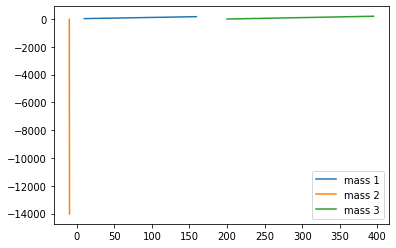

In [80]:
x1 = list()
x2 = list()
x3 = list()
y1 = list()
y2 = list()
y3 = list()
for i in range(0,len(dots),6):
  x1.append(dots[i])
  y1.append(dots[i+1])
  x2.append(dots[i+2])
  y2.append(dots[i+3])
  x3.append(dots[i+4])
  y3.append(dots[i+5])

plt.plot(x1, y1, label = "mass 1")
plt.plot(x2, y2, label = "mass 2")
plt.plot(x3, y3, label = "mass 3")
plt.legend()
plt.show()



  


In [81]:
# fig = plt.figure()
# ax1 = fig.add_subplot(122)
ani = FuncAnimation(fig, my_func, frames=20, interval=500, repeat=False)
plt.show()


NameError: ignored

In [ ]:
prob/(t+1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.axis([0, 10, 0, 1])

for i in range(10):
    y = np.random.random()
    plt.scatter(i, y)
    plt.pause(0.05)

plt.show()